# NHL Data Analysis
  "If you have time can you put like an intro here? Doesnt have to be long"
### Research Questions
    - Which NHL Teams have been statistcally the most dominate compared to achieved results
    - For each NHL Team, who has had the most "Successful Tenure"
    - "Vanessa fill in"
    - "Vanessa Fill in"
---
Please view both of our EDA's beforehand for a little more context and understanding of what will be doing!

### Loading Preliminary functions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport
import sys
sys.path.append('..')
from scripts import ProjectFunctions as pf

### Importing Data Lists
The next line I am just importing the data from my local repository, this can be changed to a url or any other method for replicaton
- The [NHL DATA is from this Kaggle page.](https://www.kaggle.com/martinellis/nhl-game-data) for convienance

All data is provided and can be sourced from the NHL’s API, unofficial documentation can be found on Drew Hynes’ gitlab here: https://gitlab.com/dword4/nhlapi/-/blob/master/stats-api.md

In [6]:
k = "C:/Users/keati/Documents/Cosc301/Nhl_Data/game_teams_stats.csv"
l = "C:/Users/keati/Documents/Cosc301/Nhl_Data/team_info.csv"

df1 = pf.CoachData(k)
df2 = pf.TeamData(k)
df3 = pf.TeamList(l)

Coach_df = pd.merge(df3,df1, how='inner')
total_df = pd.concat([df3,df2],axis=1).reindex(df2.index)

## Most dominate

## Successful Tenure

To start off our analysis of the most dominate team I first wanted to look at each individual team and figure out who on which coach has had the best run on each team

In [15]:
Total = Most = Coach_df.sort_values('won').drop_duplicates('teamName', keep = 'last').reset_index(drop=True)

In [16]:
Total

,team_id,shortName,teamName,head_coach,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
0,13,Florida,Panthers,Bob Boughner,116,773.0,8233.0,5455.0,2275.0,787.0,191.0,12343.7,3544.0,2244.0,3448.0
1,11,Atlanta,Thrashers,Bob Hartley,136,852.0,8247.0,4847.0,4638.0,1548.0,260.0,0.0,3076.0,2355.0,3865.0
2,20,Calgary,Flames,Bob Hartley,139,823.0,8420.0,6429.0,2967.0,965.0,171.0,14436.7,2969.0,2436.0,5222.0
3,4,Philadelphia,Flyers,Peter Laviolette,154,878.0,9188.0,7380.0,4554.0,1122.0,221.0,11637.7,2318.0,1799.0,4591.0
4,9,Ottawa,Senators,Jacques Martin,181,1036.0,9763.0,2606.0,4768.0,1464.0,288.0,0.0,1323.0,822.0,1168.0
5,1,New Jersey,Devils,John Hynes,191,1185.0,13630.0,10349.0,4399.0,1480.0,268.0,22517.6,3790.0,3240.0,6282.0
6,27,Phoenix,Coyotes,Dave Tippett,202,1025.0,11946.0,9920.0,4124.0,1373.0,220.0,16105.3,2323.0,2285.0,5236.0
7,54,Vegas,Golden Knights,Gerard Gallant,204,1163.0,12768.0,10419.0,3051.0,1107.0,219.0,18803.7,3439.0,4043.0,5371.0
8,12,Carolina,Hurricanes,Paul Maurice,219,1345.0,15481.0,7012.0,6309.0,2384.0,389.0,4886.6,2104.0,2297.0,4213.0
9,2,NY Islanders,Islanders,Jack Capuano,237,1384.0,15562.0,13398.0,5549.0,1582.0,280.0,24758.7,4982.0,4579.0,8354.0


- From this dataframe I was able to plot and see which had the most amount of wins with each individual team

Text(0.5, 1.0, 'Most Wins for each Team')

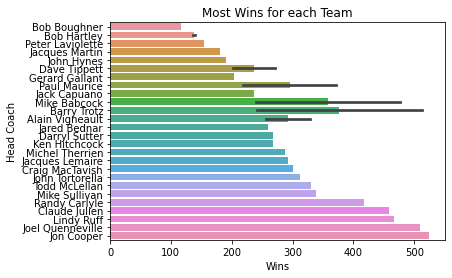

In [17]:
Most_wins = Total.sort_values('won').drop_duplicates('teamName', keep = 'last').reset_index(drop=True)
sns.barplot(x='won',y='head_coach',data=Most_wins,linewidth=4)
plt.xlabel("Wins")
plt.ylabel("Head Coach")
plt.title("Most Wins for each Team")

Moving on from this base Information I wanted to see what made each coach with there respective made them so successful.

To achieve this I created another two columns figuring out the each teams total goal percentage and power play goal percentage

In [23]:
Total['Goal Percentage in %'] = ((Total['goals']/Total['shots'])*100)
Total['PPG Goal Percentage in %'] = ((Total['powerPlayGoals']/Total['powerPlayOpportunities'])*100)
Total

,team_id,shortName,teamName,head_coach,won,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,Goal Percentage in %,PPG Goal Percentage in %
0,13,Florida,Panthers,Bob Boughner,116,773.0,8233.0,5455.0,2275.0,787.0,191.0,12343.7,3544.0,2244.0,3448.0,9.389044,24.269377
1,11,Atlanta,Thrashers,Bob Hartley,136,852.0,8247.0,4847.0,4638.0,1548.0,260.0,0.0,3076.0,2355.0,3865.0,10.331029,16.795866
2,20,Calgary,Flames,Bob Hartley,139,823.0,8420.0,6429.0,2967.0,965.0,171.0,14436.7,2969.0,2436.0,5222.0,9.774347,17.720207
3,4,Philadelphia,Flyers,Peter Laviolette,154,878.0,9188.0,7380.0,4554.0,1122.0,221.0,11637.7,2318.0,1799.0,4591.0,9.555943,19.696970
4,9,Ottawa,Senators,Jacques Martin,181,1036.0,9763.0,2606.0,4768.0,1464.0,288.0,0.0,1323.0,822.0,1168.0,10.611492,19.672131
5,1,New Jersey,Devils,John Hynes,191,1185.0,13630.0,10349.0,4399.0,1480.0,268.0,22517.6,3790.0,3240.0,6282.0,8.694057,18.108108
6,27,Phoenix,Coyotes,Dave Tippett,202,1025.0,11946.0,9920.0,4124.0,1373.0,220.0,16105.3,2323.0,2285.0,5236.0,8.580278,16.023307
7,54,Vegas,Golden Knights,Gerard Gallant,204,1163.0,12768.0,10419.0,3051.0,1107.0,219.0,18803.7,3439.0,4043.0,5371.0,9.108709,19.783198
8,12,Carolina,Hurricanes,Paul Maurice,219,1345.0,15481.0,7012.0,6309.0,2384.0,389.0,4886.6,2104.0,2297.0,4213.0,8.688069,16.317114
9,2,NY Islanders,Islanders,Jack Capuano,237,1384.0,15562.0,13398.0,5549.0,1582.0,280.0,24758.7,4982.0,4579.0,8354.0,8.893458,17.699115
